Before Recalibration:  MACE: 0.02613, RMSCE: 0.02996, MA: 0.02639


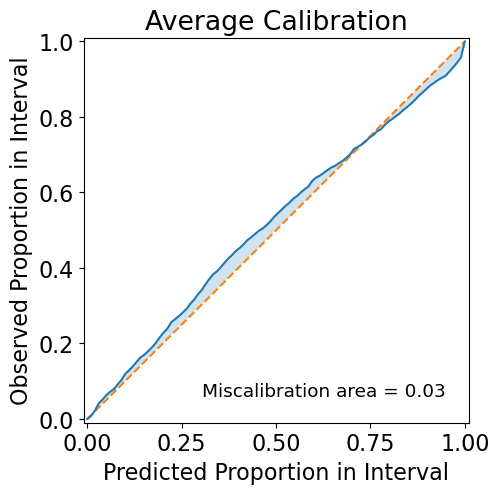

In [9]:
import uncertainty_toolbox as uct
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

mixed =False
if mixed:
    f = "../global_synthetic_benchmark/results/new_synthetic/models_mixed/pnn_n_40000_s_2.00_n_test_1500_n_exp_200/pnn_test_output.csv"
else:
    f = "../global_synthetic_benchmark/results/new_synthetic/models/pnn_n_40000_s_2.00_n_test_1500_n_exp_200/pnn_test_output.csv"

results = pd.read_csv(f)
results = results.rename(columns={'mu_test':'pred_mean', 'sigma_test': 'pred_std', 'y_test': 'y'})

pred_mean = results["pred_mean"].values
pred_std = results["pred_std"].values
y = results["y"].values

exp_props, obs_props = uct.get_proportion_lists_vectorized(
    pred_mean, pred_std, y
)
mace = uct.mean_absolute_calibration_error(
    pred_mean, pred_std, y, recal_model=None
)
rmsce = uct.root_mean_squared_calibration_error(
    pred_mean, pred_std, y, recal_model=None
)
ma = uct.miscalibration_area(pred_mean, pred_std, y, recal_model=None)
print("Before Recalibration:  ", end="")
print("MACE: {:.5f}, RMSCE: {:.5f}, MA: {:.5f}".format(mace, rmsce, ma))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
uct.plot_calibration(
    pred_mean,
    pred_std,
    y,
    exp_props=exp_props,
    obs_props=obs_props,
    ax=ax,
)
if mixed:
    f = "calibration_synthetic_mixed.pdf"
else:
    f = "calibration_synthetic.pdf"
plt.savefig(f, format='pdf', bbox_inches='tight')

plt.show()
